# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras.backend as K
from tensorflow.keras import layers, regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, silhouette_samples, silhouette_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor, kneighbors_graph
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression


In [35]:
from data_preperation import data_preperation



dataframe info
<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int

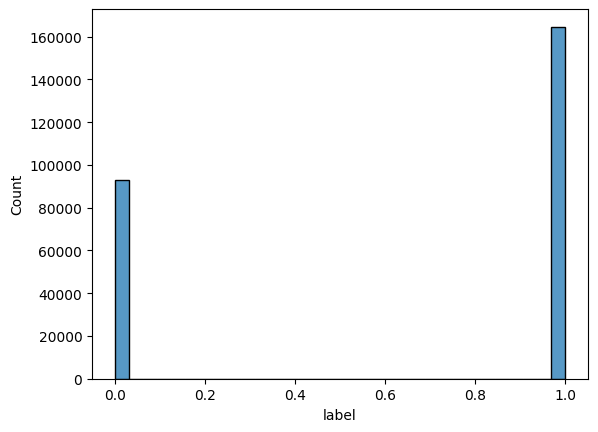

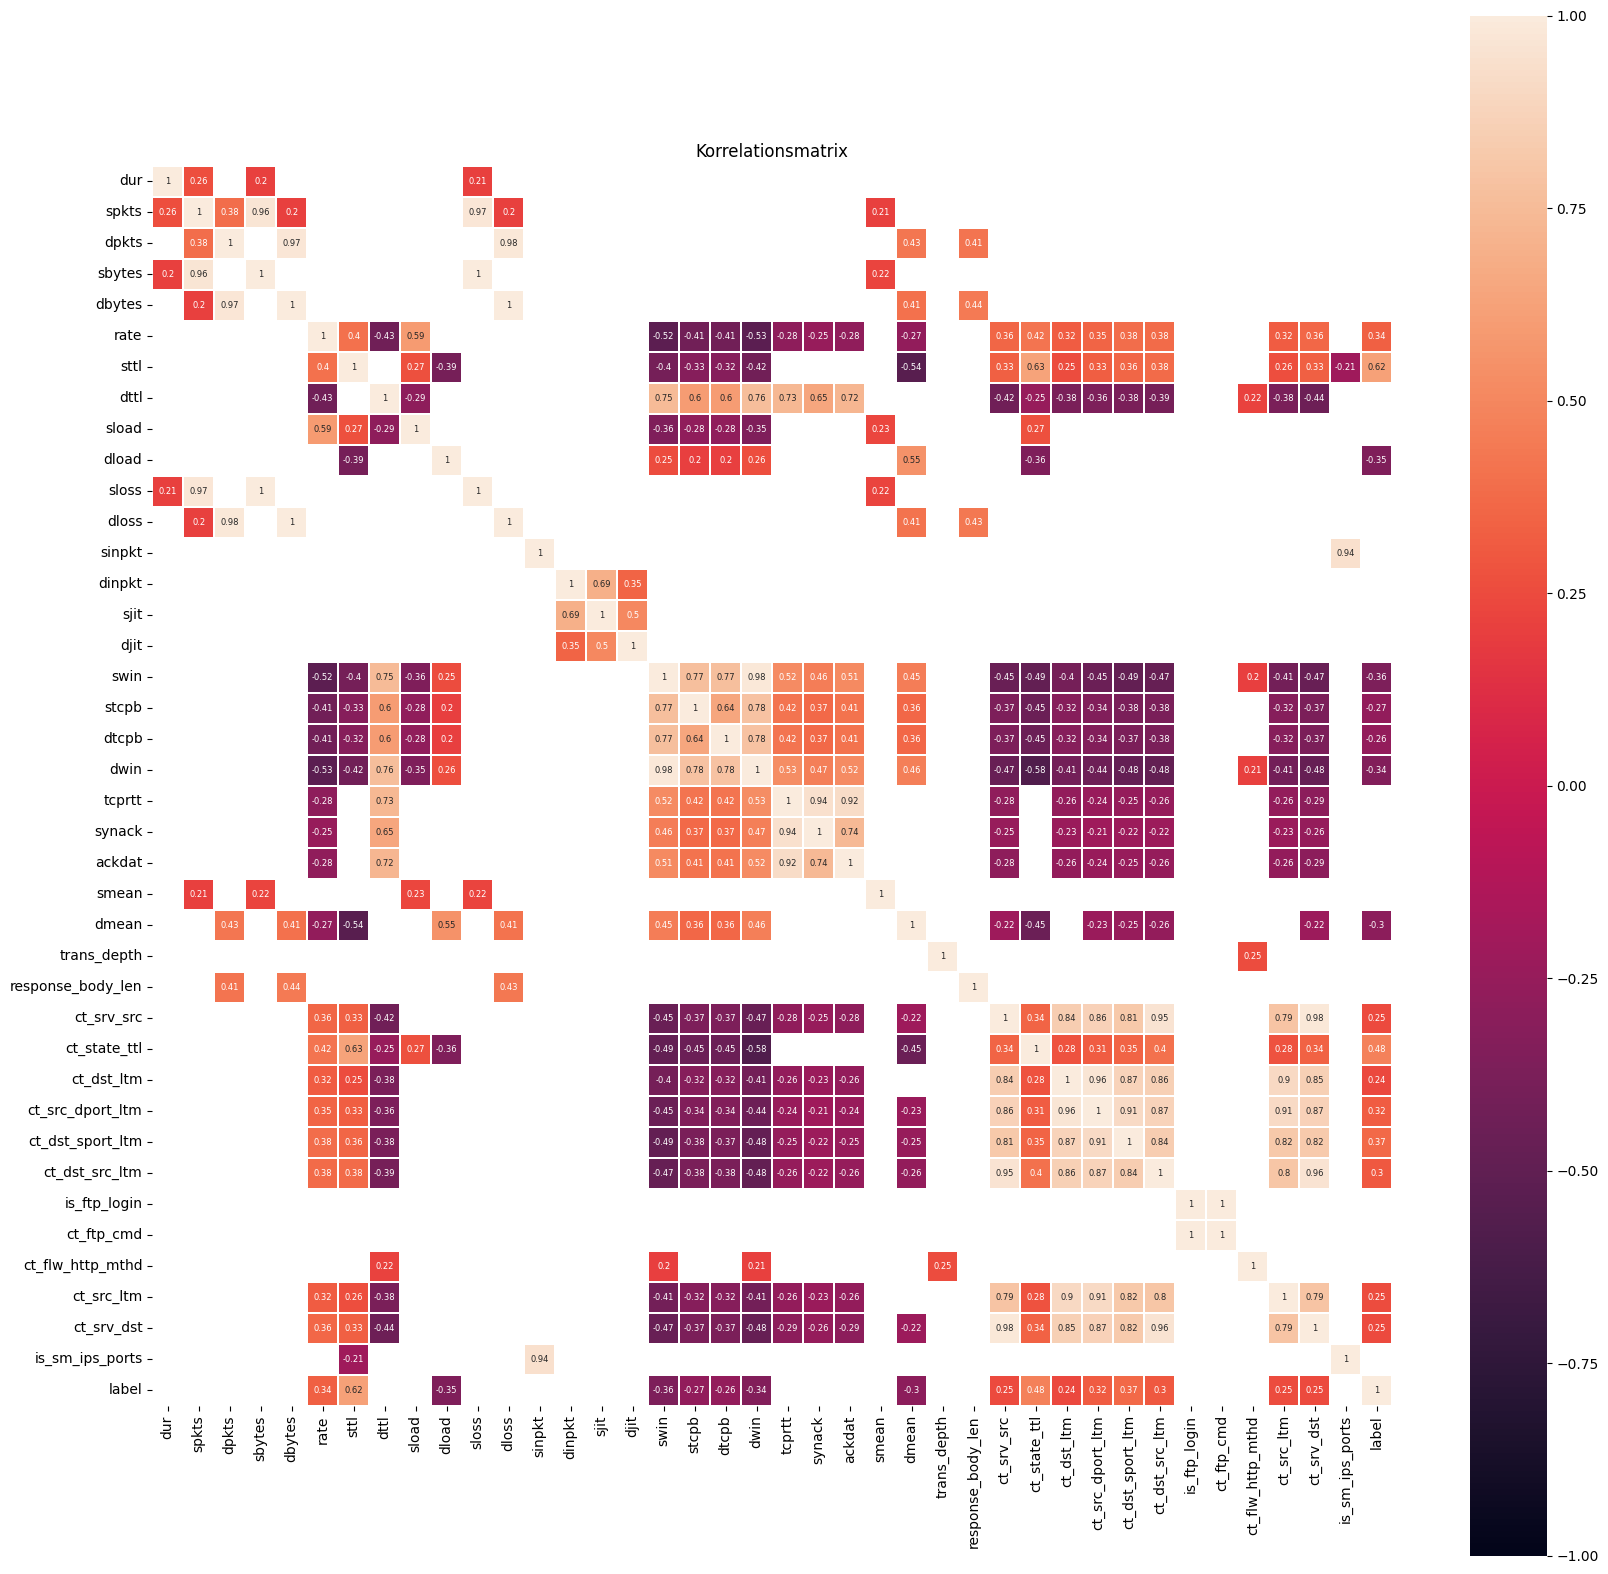

dur                 0.029096
sbytes              0.019376
rate                0.335883
sttl                0.624082
dttl                0.019369
sload               0.165249
sloss               0.001828
ackdat              0.000817
trans_depth         0.002246
ct_srv_src          0.246596
ct_state_ttl        0.476559
ct_dst_ltm          0.240776
ct_src_dport_ltm    0.318518
ct_dst_sport_ltm    0.371672
ct_dst_src_ltm      0.299609
ct_src_ltm          0.252498
ct_srv_dst          0.247812
label               1.000000
Name: label, dtype: float64
There are 18 strongly correlated values with Target:
label               1.000000
sttl                0.624082
ct_state_ttl        0.476559
ct_dst_sport_ltm    0.371672
rate                0.335883
ct_src_dport_ltm    0.318518
ct_dst_src_ltm      0.299609
ct_src_ltm          0.252498
ct_srv_dst          0.247812
ct_srv_src          0.246596
ct_dst_ltm          0.240776
sload               0.165249
dur                 0.029096
sbytes              

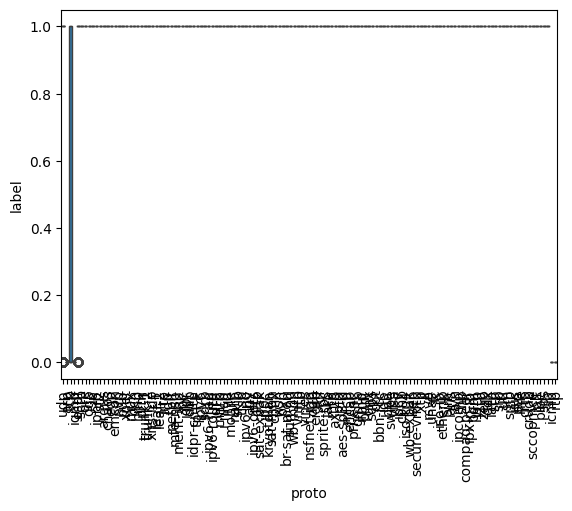

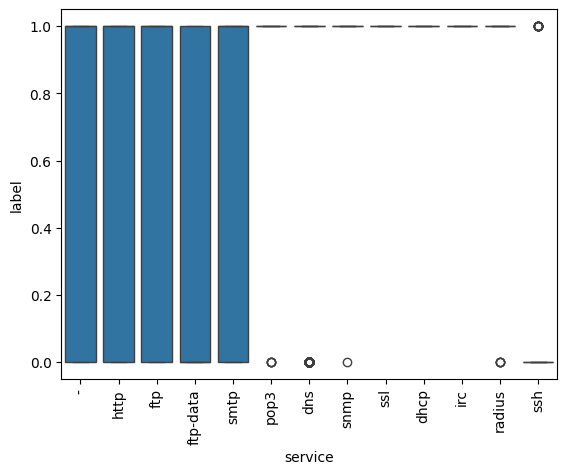

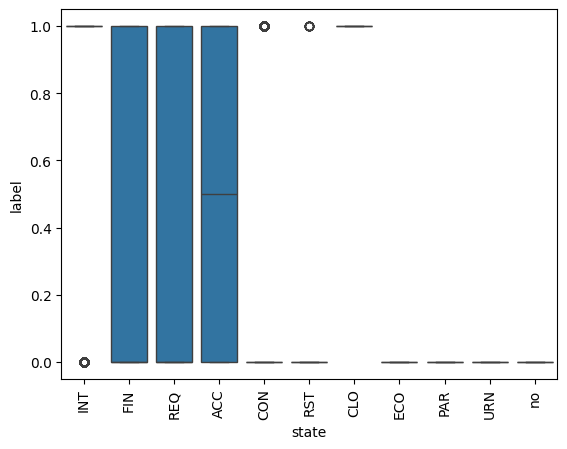

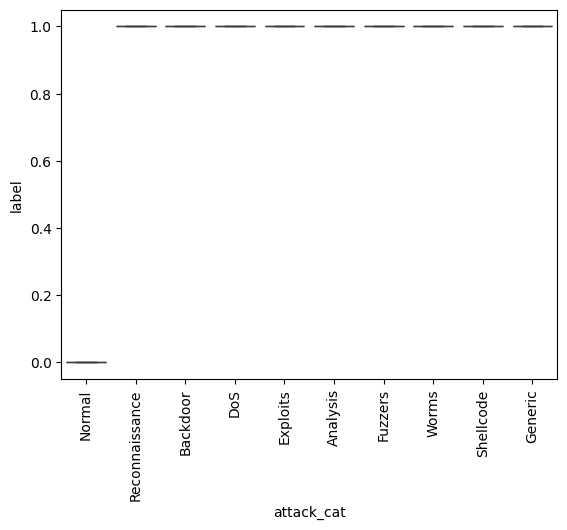

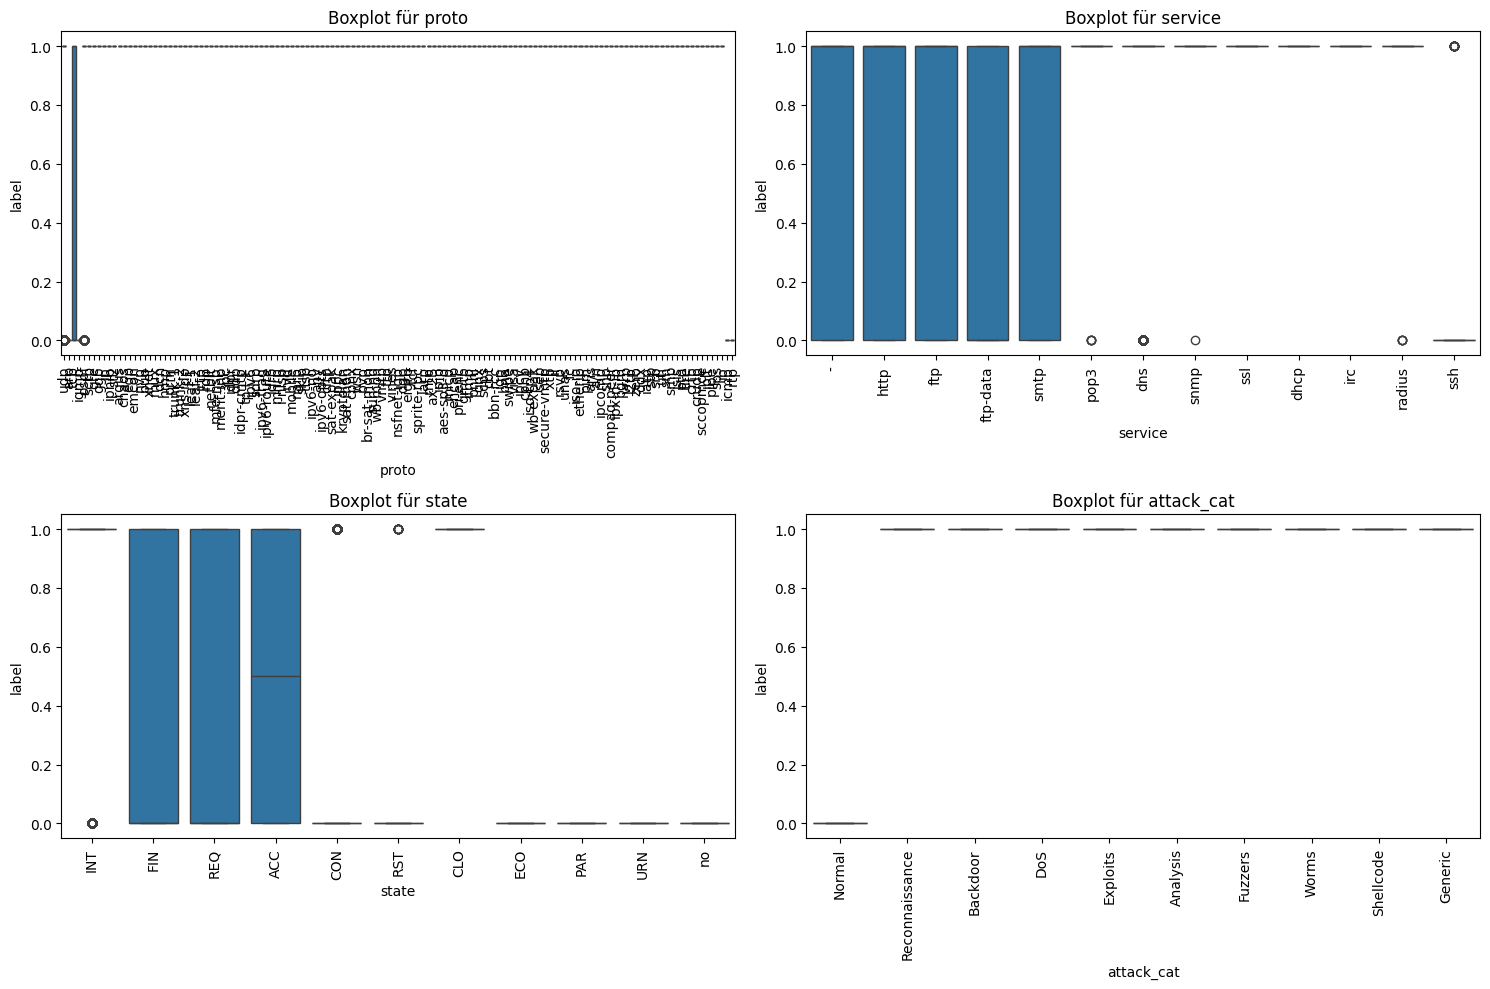

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt 

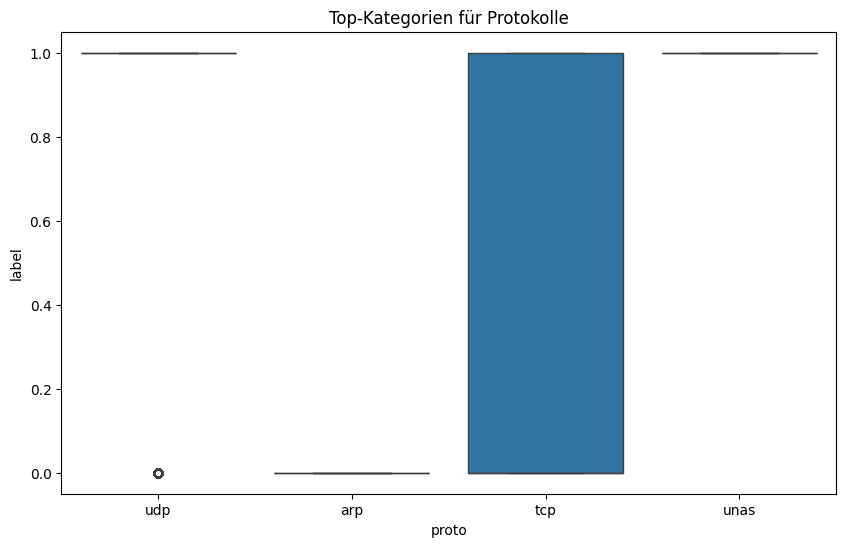

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   label             257673 non-null  int64  
 1   sttl              257673 non-null  int64  
 2   ct_state_ttl      257673 non-null  int64  
 3   ct_dst_sport_ltm  257673 non-null  int64  
 4   rate              257673 non-null  float64
 5   ct_src_dport_ltm  257673 non-null  int64  
 6   ct_dst_src_ltm    257673 non-null  int64  
 7   ct_src_ltm        257673 non-null  int64  
 8   ct_srv_dst        257673 non-null  int64  
 9   ct_srv_src        257673 non-null  int64  
 10  ct_dst_ltm        257673 non-null  int64  
 11  sload             257673 non-null  float64
 12  dur               257673 non-null  float64
 13  sbytes            257673 non-null  int64  
 14  dttl              257673 non-null  int64  
 15  trans_depth       257673 non-null  int64  
 16  sloss             257673 

In [36]:
raw_data, dataframe = data_preperation(feature_analysis=True)

In [37]:
from data_normalisation import data_normalisation

In [38]:
normal_train_data_wl_normalized, normal_test_data_wl_normalized, anomalous_train_data_wl_normalized, anomalous_test_data_wl_normalized,normal_test_data_labels = data_normalisation(raw_data,normalisation=2)


train_data : 91181
test_data : 22796
normal train_data : 43212
normal_test_data : 10900
anormalous train_data : 47969
anormalous test_data : 11896
normalisation MinMaxScaler


In [39]:
normal_train_data_wl_normalized[2]

<tf.Tensor: shape=(27,), dtype=float32, numpy=
array([9.9481863e-01, 2.5000000e-01, 0.0000000e+00, 8.2522310e-02,
       0.0000000e+00, 0.0000000e+00, 1.6949153e-02, 0.0000000e+00,
       5.8823530e-02, 0.0000000e+00, 2.4516140e-03, 1.2196118e-02,
       3.7657708e-05, 0.0000000e+00, 0.0000000e+00, 4.7551119e-04,
       3.8810138e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00], dtype=float32)>

In [40]:
print(normal_train_data_wl_normalized.shape[1])

27


### plot data instance

In [8]:
def plot_instance(range, normal_data_instance, anomalious_data_instance ):
    plt.grid()
    plt.plot(np.arange(range), normal_data_instance[0])
    plt.title("A Normal data instance")
    plt.show()
    plt.grid()
    plt.plot(np.arange(range), anomalious_data_instance[0])
    plt.title("An anormalous data instance")
    plt.show()

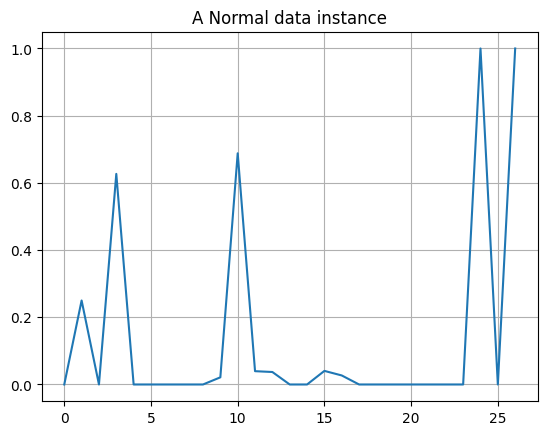

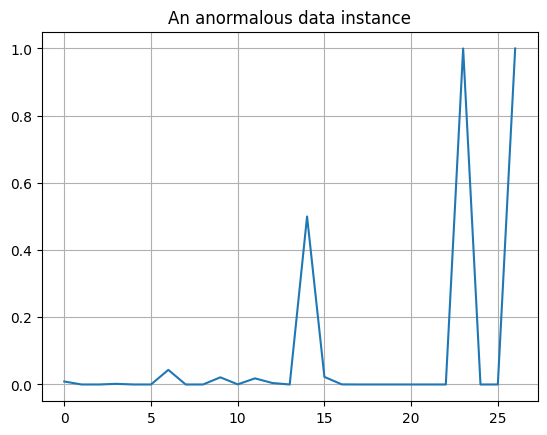

In [9]:

plot_instance(normal_train_data_wl_normalized.shape[1] , normal_train_data_wl_normalized, anomalous_train_data_wl_normalized)

### normal and anormal sample reconstruction 

In [10]:
def reconstruct_sample(model, range, normal_data_instance, anomalous_data_instance):
    encoded_data = model.encoder(normal_data_instance).numpy()
    decoded_data = model.decoder(encoded_data).numpy()
    #Normal test sample
    plt.plot(normal_data_instance[4], 'b')
    plt.plot(decoded_data[4], 'r')
    plt.fill_between(np.arange(range), decoded_data[1], normal_data_instance[1], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()
    
    encoded_data = model.encoder(anomalous_data_instance).numpy()
    decoded_data = model.decoder(encoded_data).numpy()
    # anomaly data sample
    plt.plot(anomalous_data_instance[4], 'b')
    plt.plot(decoded_data[4], 'r')
    plt.fill_between(np.arange(range), decoded_data[1], anomalous_data_instance[1], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    # plt.xlabel("Train loss")
    # plt.ylabel("No of examples")
    plt.show()

In [11]:
def reconstruct_data(model, normal_test_data_instance, anormalous_test_data_instance):
    reconstructions_normal = model.predict(normal_test_data_instance)
    reconstructions_anomalous = model.predict(anormalous_test_data_instance)
    
    errors_normal = np.mean(np.abs(reconstructions_normal - normal_test_data_instance), axis=1)
    errors_anomalous = np.mean(np.abs(reconstructions_anomalous - anormalous_test_data_instance), axis=1)
    
    sns.histplot(errors_normal, label='Normal', kde=True, color='blue')
    sns.histplot(errors_anomalous, label='Anomalous', kde=True, color='red')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    print()
    reconstructions = model.predict(normal_test_data_instance)
    train_loss = tf.keras.losses.mae(reconstructions, normal_test_data_instance)
    threshold = np.mean(train_loss) + np.std(train_loss)
    
    plt.hist(train_loss[None,:], bins=50)
    plt.xlabel("Train loss")
    plt.ylabel("No of examples")
    plt.show()

    
    # 
    reconstructions = model.predict(anormalous_test_data_instance)
    test_loss = tf.keras.losses.mae(reconstructions, anormalous_test_data_instance)
    
    print()
    plt.hist(test_loss[None, :], bins=50)
    plt.xlabel("Test loss")
    plt.ylabel("No of examples")
    # Add a vertical line at the threshold value
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    
    plt.legend()
    plt.show()
    
    print("Threshold: ", threshold)
    return threshold

In [31]:
def train_model(model, train_data, test_data):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True)
    
    history = model.fit(
        train_data,
        train_data,
        epochs=200,
        batch_size=1024,
        validation_data=(test_data, test_data),
        shuffle=True,
        callbacks=[early_stopping])
    return history

In [3]:
def predict_anomaly(model, data_instance, threshold):
    data_instance = tf.expand_dims(data_instance, axis=0)

    reconstructed_instance = model(data_instance)

    mse_loss = tf.reduce_mean(tf.square(data_instance - reconstructed_instance))

    if mse_loss > threshold:
        result = "Anomaly"
    else:
        result = "Normal"

    return result

In [4]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

### Training curve

In [5]:
def plot_training_curve(history):
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()

# unsupervised Contractive Autoencoder

In [16]:

class ContractiveAnomalyDetector(tf.keras.Model):
    def __init__(self, lam=1e-8 ): 
        super(ContractiveAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(normal_train_data_wl_normalized.shape[1], activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization()])

        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(normal_train_data_wl_normalized.shape[1], activation="sigmoid")])

        self.lam = lam  # Regularization strength

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    
    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        # Combine the losses
        total_loss = mse_loss + self.lam * frobenius_norm # + self.constant_valu
        return total_loss       

  

In [17]:
    def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            x_hat = self(x)
            jacobian = self.compute_jacobian(x)
            loss = self.contractive_loss(x, x_hat, jacobian)
            
        gradients = tape.gradient(loss, self.trainable_variables)
        clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
        self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

        return {"loss": loss}
# The compute_jacobian method calculates the Jacobian matrix of the encoded representation with respect to the input.

# The contractive_loss method computes the contractive loss, which is a combination of the mean squared error (MSE) reconstruction loss and the Frobenius norm of the Jacobian matrix.

# The train_step method is overridden to include the contractive loss during training.


In [18]:
contractive_autoencoder = ContractiveAnomalyDetector()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_autoencoder.compile(optimizer=optimizer, loss='mse')

In [19]:
contractive_autoencoder.build(input_shape = (None, normal_train_data_wl_normalized.shape[1]))
contractive_autoencoder.summary()


Model: "contractive_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 5880      
                                                                 
 sequential_1 (Sequential)   (None, 27)                5107      
                                                                 
Total params: 10987 (42.92 KB)
Trainable params: 10453 (40.83 KB)
Non-trainable params: 534 (2.09 KB)
_________________________________________________________________


In [20]:
history = train_model(contractive_autoencoder, normal_train_data_wl_normalized, normal_test_data_wl_normalized)

Epoch 1/200

43/43 [==============================] - 15s 55ms/step - loss: 0.2131 - val_loss: 0.1943
Epoch 2/200
43/43 [==============================] - 1s 22ms/step - loss: 0.1385 - val_loss: 0.1324
Epoch 3/200
43/43 [==============================] - 1s 20ms/step - loss: 0.0757 - val_loss: 0.0847
Epoch 4/200
43/43 [==============================] - 1s 20ms/step - loss: 0.0418 - val_loss: 0.0781
Epoch 5/200
43/43 [==============================] - 1s 21ms/step - loss: 0.0302 - val_loss: 0.0789
Epoch 6/200
43/43 [==============================] - 1s 21ms/step - loss: 0.0247 - val_loss: 0.0815
Epoch 7/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0199 - val_loss: 0.0847
Epoch 8/200
43/43 [==============================] - 1s 20ms/step - loss: 0.0166 - val_loss: 0.0898
Epoch 9/200
43/43 [==============================] - 1s 19ms/step - loss: 0.0121 - val_loss: 0.0968
Epoch 10/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0099 - val_loss: 0.10

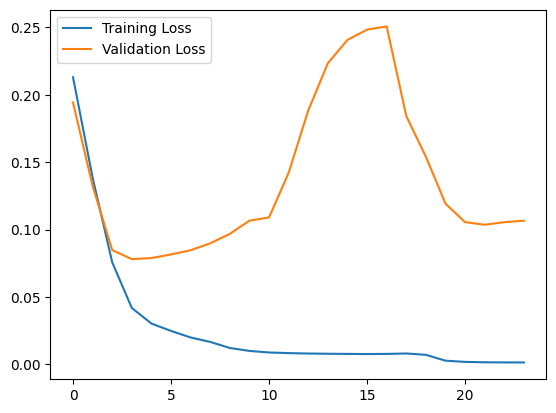

In [21]:
plot_training_curve(history)

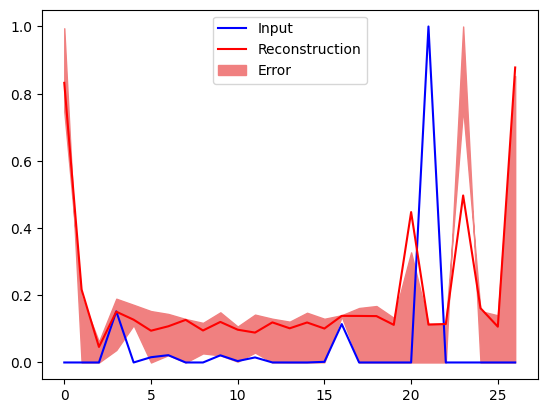

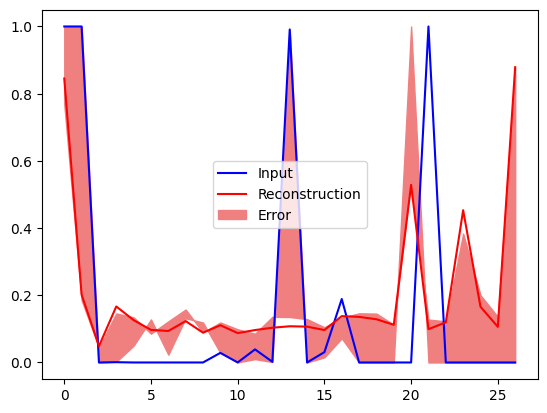

In [22]:
reconstruct_sample(contractive_autoencoder, normal_test_data_wl_normalized.shape[1], normal_test_data_wl_normalized,anomalous_test_data_wl_normalized)

372/372 [==============================] - 2s 6ms/step


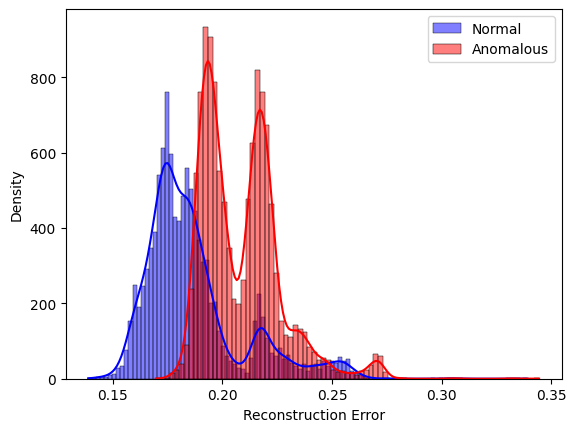


341/341 [==============================] - 2s 6ms/step


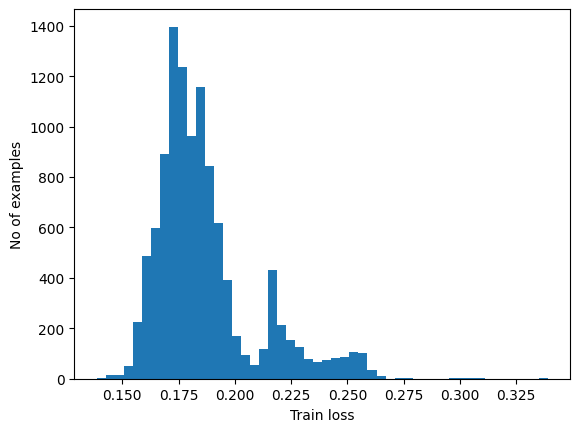

372/372 [==============================] - 2s 6ms/step



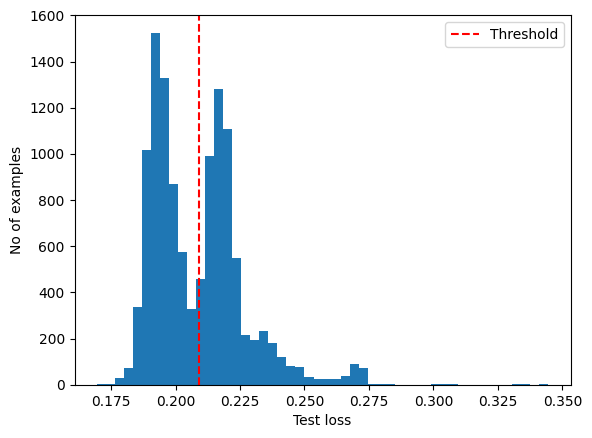

Threshold:  0.20902649


In [23]:
threshold = reconstruct_data(contractive_autoencoder, normal_test_data_wl_normalized, anomalous_test_data_wl_normalized)

In [24]:
prediction  = predict_anomaly(contractive_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

prediction_2  = predict_anomaly(contractive_autoencoder, anomalous_test_data_wl_normalized[9], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Normal.
The data instance is predicted as Normal.


In [25]:
print('contractive autoencoder:')
print("Threshold: ", threshold)
preds = predict(contractive_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

contractive autoencoder:
Threshold:  0.20902649
Accuracy = 0.8421100917431192
Precision = 1.0
Recall = 0.8421100917431192


# unsupervised Sparse Autoencoder

In [26]:
class SparseAnomalyDetector(tf.keras.Model):
    def __init__(self, num_features, encoding_dim, sparsity_factor=1e-2):
        super(SparseAnomalyDetector, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(num_features,)),
            layers.Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(encoding_dim,)),
            layers.Dense(num_features, activation="sigmoid"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

num_features = normal_train_data_wl_normalized.shape[1]
encoding_dim = 8  
sparsity_factor = 1e-2 

sparse_autoencoder = SparseAnomalyDetector(num_features=num_features, encoding_dim=encoding_dim, sparsity_factor=sparsity_factor)


In [27]:
sparse_autoencoder.compile(optimizer='adam', loss='mae')

In [28]:
sparse_autoencoder.build(input_shape=(None, normal_train_data_wl_normalized.shape[1]))
sparse_autoencoder.summary()

Model: "sparse_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 8)                 224       
                                                                 
 sequential_3 (Sequential)   (None, 27)                243       
                                                                 
Total params: 467 (1.82 KB)
Trainable params: 467 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history_sparse = train_model(sparse_autoencoder,normal_train_data_wl_normalized,normal_test_data_wl_normalized)

Epoch 1/200
43/43 [==============================] - 2s 19ms/step - loss: 0.4753 - val_loss: 0.4645
Epoch 2/200
43/43 [==============================] - 1s 12ms/step - loss: 0.4465 - val_loss: 0.4335
Epoch 3/200
43/43 [==============================] - 0s 10ms/step - loss: 0.3976 - val_loss: 0.3774
Epoch 4/200
43/43 [==============================] - 0s 10ms/step - loss: 0.3104 - val_loss: 0.3073
Epoch 5/200
43/43 [==============================] - 0s 7ms/step - loss: 0.2335 - val_loss: 0.2594
Epoch 6/200
43/43 [==============================] - 0s 9ms/step - loss: 0.1911 - val_loss: 0.2332
Epoch 7/200
43/43 [==============================] - 0s 8ms/step - loss: 0.1709 - val_loss: 0.2183
Epoch 8/200
43/43 [==============================] - 0s 8ms/step - loss: 0.1602 - val_loss: 0.2089
Epoch 9/200
43/43 [==============================] - 0s 9ms/step - loss: 0.1529 - val_loss: 0.2019
Epoch 10/200
43/43 [==============================] - 0s 9ms/step - loss: 0.1469 - val_loss: 0.1961
Epoch

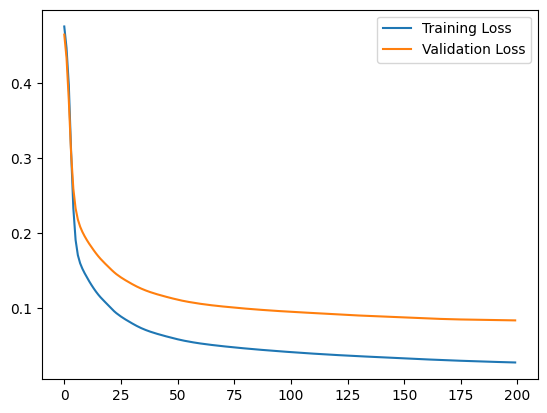

In [30]:
plot_training_curve(history_sparse)

372/372 [==============================] - 2s 4ms/step


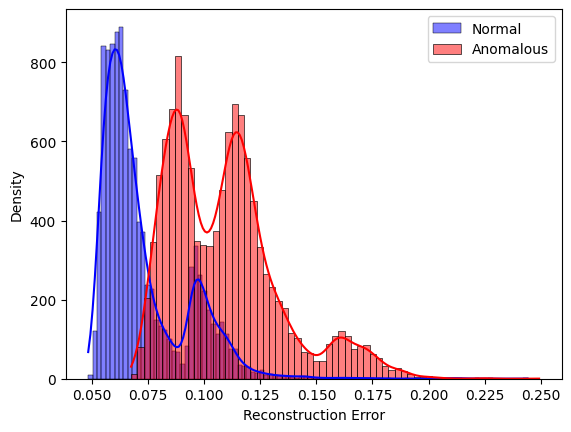


341/341 [==============================] - 1s 4ms/step


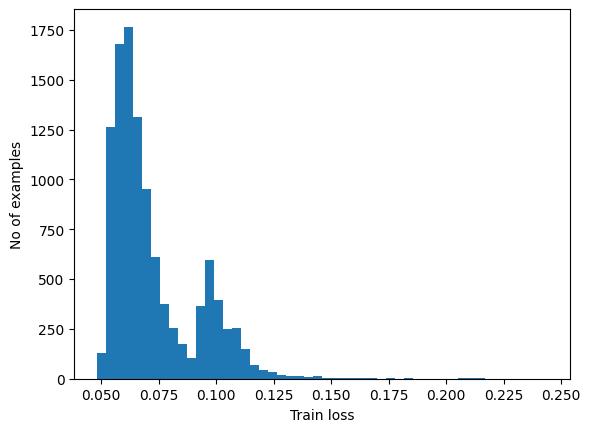

372/372 [==============================] - 2s 4ms/step



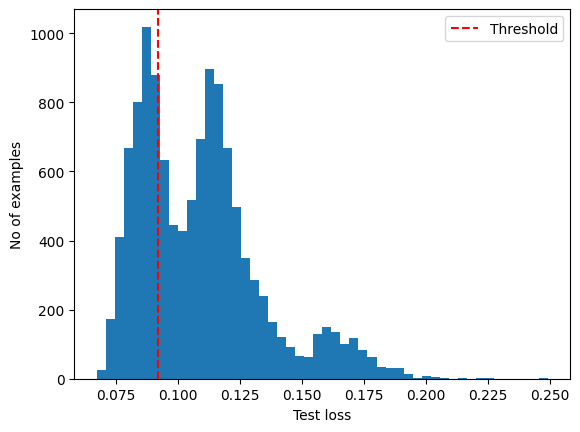

Threshold:  0.09197332


In [31]:
threshold = reconstruct_data(sparse_autoencoder, normal_test_data_wl_normalized, anomalous_test_data_wl_normalized)

In [32]:
prediction  = predict_anomaly(sparse_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Normal.


In [33]:
print('sparse autoencoder')
print("Threshold: ", threshold)
preds = predict(sparse_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

sparse autoencoder
Threshold:  0.09197332
Accuracy = 0.7922018348623853
Precision = 1.0
Recall = 0.7922018348623853


# unsupervised LOF( Local Outlier Factor) Algorithmus zur Anomalieerkennung

In [34]:
dataframe

,label,sttl,ct_state_ttl,ct_dst_sport_ltm,rate,ct_src_dport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,...,proto_arp,proto_tcp,proto_udp,service_-,service_ftp,service_ftp-data,service_http,service_smtp,state_ACC,state_FIN
29,0,254,1,1,10.459041,1,1,1,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0,254,1,1,8.834441,1,1,1,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32,0,254,1,1,7.570899,1,1,2,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34,0,254,1,1,11.603770,1,3,2,2,4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
35,0,62,1,1,17.278635,1,2,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175248,1,62,1,1,136.558356,1,1,18,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
175267,1,62,1,1,53.805315,1,1,18,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
175277,1,62,1,1,108.897021,1,1,2,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
175305,1,62,1,1,31.468251,1,2,2,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [35]:
dataframe.shape

(113977, 28)

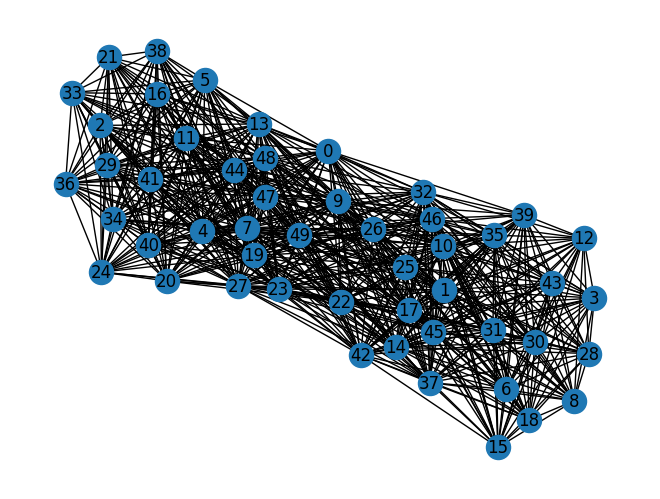


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.53      0.95      0.68     12099
           1       0.46      0.05      0.09     10697

    accuracy                           0.53     22796
   macro avg       0.50      0.50      0.38     22796
weighted avg       0.50      0.53      0.40     22796



In [36]:
df = dataframe
y_true = dataframe['label']
X = df.iloc[:, 1:]  # Features
n_neighbors=20


X_train, X_test, y_true_train, y_true_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

lof = LocalOutlierFactor(n_neighbors, contamination=0.05) 
y_pred_train = lof.fit_predict(X_train)

y_pred_binary_train = np.where(y_pred_train == -1, 1, 0)



y_pred_test = lof.fit_predict(X_test)

y_pred_binary_test = np.where(y_pred_test == -1, 1, 0)



sample_size = 50
sampled_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
sampled_graph = kneighbors_graph(X_train.iloc[sampled_indices], n_neighbors)

dense_sampled_graph = sampled_graph.toarray()

G = nx.Graph(dense_sampled_graph)

nx.draw(G, with_labels=True)
plt.show()

classification_rep_test = classification_report(y_true_test, y_pred_binary_test)
print("\nClassification Report for Test Data:\n", classification_rep_test)

In [37]:
original_data_point_index = 32

corresponding_datapoint = X_train.iloc[original_data_point_index]

is_anomaly = y_pred_binary_train[sampled_indices[original_data_point_index]] == 1

print(f"Corresponding Datapoint for Graph Point {original_data_point_index}:\n{corresponding_datapoint}")
print(f"Is Anomaly: {is_anomaly}")


Corresponding Datapoint for Graph Point 32:
sttl                 254.000000
ct_state_ttl           1.000000
ct_dst_sport_ltm       1.000000
rate                  18.086955
ct_src_dport_ltm       1.000000
ct_dst_src_ltm         3.000000
ct_src_ltm             2.000000
ct_srv_dst             3.000000
ct_srv_src             4.000000
ct_dst_ltm             1.000000
sload               4639.906738
dur                    0.829327
sbytes               534.000000
dttl                 252.000000
trans_depth            0.000000
sloss                  2.000000
ackdat                 0.038563
proto_arp              0.000000
proto_tcp              1.000000
proto_udp              0.000000
service_-              1.000000
service_ftp            0.000000
service_ftp-data       0.000000
service_http           0.000000
service_smtp           0.000000
state_ACC              0.000000
state_FIN              1.000000
Name: 81362, dtype: float64
Is Anomaly: False


In [38]:
def optimise_k_means(data, max_k):
    means =[]
    inertias = []
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias,'o-')
    plt.ylabel('Inertia')
    plt.xlabel('number of clusters')
    plt.grid(True)
    plt.show()

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [39]:
data_for_clustering = raw_data
#data_for_clustering = data_for_clustering.drop('label', axis=1)   
max_k = 10

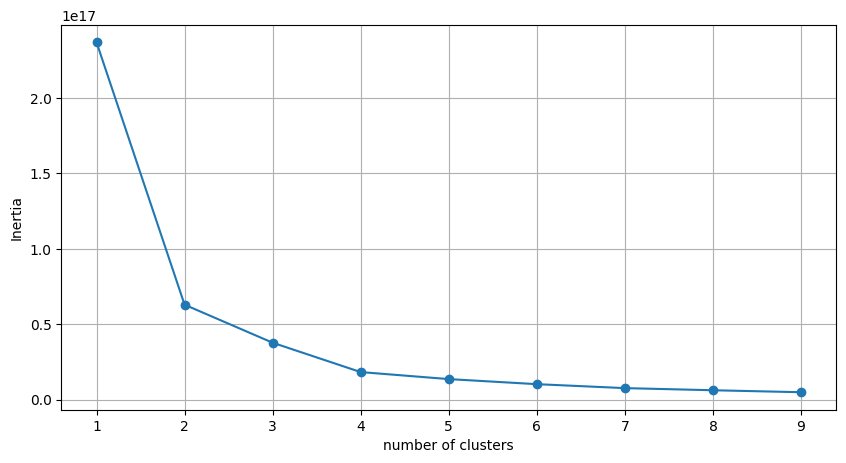

In [40]:
# Perform k-means clustering
optimise_k_means(data_for_clustering, max_k)

In [41]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k,n_init=10)

In [42]:
cluster_labels = kmeans.fit_predict(data_for_clustering)

In [43]:
data_for_clustering

array([[  0., 254.,   1., ...,   0.,   0.,   1.],
       [  0., 254.,   1., ...,   0.,   0.,   1.],
       [  0., 254.,   1., ...,   0.,   0.,   1.],
       ...,
       [  1.,  62.,   1., ...,   0.,   0.,   1.],
       [  1.,  62.,   1., ...,   1.,   0.,   1.],
       [  1., 254.,   1., ...,   0.,   0.,   1.]])

In [ ]:
features = data_for_clustering[:, 1:]
silhouette_scores = silhouette_score(features, cluster_labels)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

In [ ]:
# Extract labels and features
labels = data_for_clustering[:, 0]

# Assign labels based on silhouette score threshold
threshold = 0.5  # Adjust this threshold based on your specific needs
if silhouette_scores >= threshold:
    label_assigned = 'normal'
else:
    label_assigned = 'anomaly'
    
labels_assigned = np.full(data_for_clustering.shape[0], label_assigned)

# Create a DataFrame with the assigned label
df_labels = pd.DataFrame({'label': [label_assigned]})

# Convert DataFrame to NumPy array
labels_array = df_labels.values.ravel()
print("Dimensions of data_for_clustering:", data_for_clustering.shape)
print("Dimensions of labels_array:", labels_array.shape)
print("Dimensions of labels_assigned:", labels_assigned.shape)
print("Dimensions of silhouette_scores:", silhouette_scores)

# Concatenate features and labels
data_for_clustering_with_labels = np.column_stack((data_for_clustering, labels_array))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels_assigned, test_size=0.2, random_state=42)



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels_assigned, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()  # Or any other classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:

# Train a classifier
classifier = LogisticRegression()  
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
for i, score in enumerate(silhouette_scores):
    print(f"Instance {i}: Silhouette Score = {score}") # low score potential anomalies

## unsupervised clustering with Isolation Forest

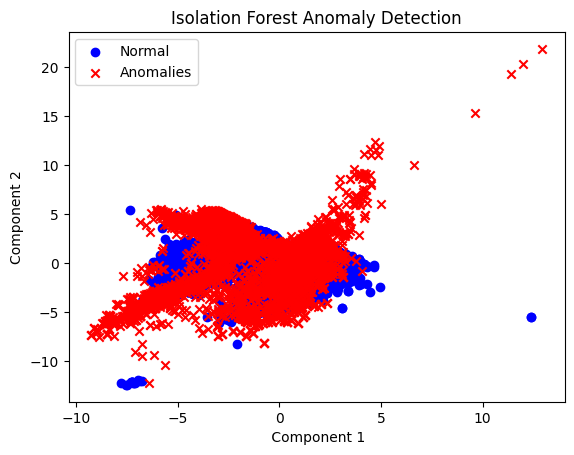

Accuracy: 0.5111557594953368
Precision: 0.3591858220740481
Recall: 0.03782894736842105
F1-score: 0.06844894751801507


In [45]:
X = dataframe.iloc[:, 1:] 
y_true = dataframe['label'] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

iso_forest = IsolationForest(contamination=0.05, random_state=42) 
iso_forest.fit(X_std)

y_pred = iso_forest.fit_predict(X_std)

y_pred_binary = (y_pred == -1).astype(int)

y_pred[y_pred == 1] = 0  
y_pred[y_pred == -1] = 1  

plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], c='blue', label='Normal')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='red', marker='x', label='Anomalies')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel(' Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
accuracy = accuracy_score(y_true, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [46]:
dataframe.insert(1, 'predicted_label', y_pred_binary)
dataframe.sample(10)

,label,predicted_label,sttl,ct_state_ttl,ct_dst_sport_ltm,rate,ct_src_dport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,...,proto_arp,proto_tcp,proto_udp,service_-,service_ftp,service_ftp-data,service_http,service_smtp,state_ACC,state_FIN
19037,0,0,31,0,1,1402.947396,1,5,4,8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
118698,1,0,254,1,1,24.021715,1,6,2,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10314,0,0,31,0,1,3292.705116,1,1,2,11,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
48821,1,0,254,1,1,34.697135,2,7,2,7,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
146314,1,0,254,1,1,39.154002,1,2,3,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
120712,1,0,62,1,1,7.826639,1,2,2,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
47356,1,0,254,1,1,15.429101,1,1,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24172,0,0,31,0,1,11314.395860,1,1,2,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
116050,1,0,62,1,1,27.522609,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
76683,0,0,254,1,1,45.180170,1,2,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Zeitreihe Datensatz

In [6]:
from credit_card_data_preperation import data_preparation, extract_time_interval_df

In [7]:
def reconstruction_data(model, train_data, anomalous_data ):
    x_train_pred = sparse_conv_autoencoder.predict(train_data)
    train_mae_loss = np.mean(np.abs(x_train_pred - train_data), axis=1)
    
    plt.hist(train_mae_loss, bins=50)
    plt.xlabel("Train MAE loss")
    plt.ylabel("No of samples")
    plt.show()
    
    threshold_sparse = np.max(train_mae_loss)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_data[0])
    plt.title('Original Data')
    
    plt.subplot(1, 2, 2)
    plt.plot(x_train_pred[0])
    plt.title('Predicted sparse Data')
    
    plt.show()
    
    # Get train MAE loss.
    x_anomalies_pred = sparse_conv_autoencoder.predict(anomalous_data)
    anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - anomalous_data), axis=1)
    
    plt.hist(anomalies_mae_loss, bins=50)
    plt.xlabel("anaomalious MAE loss")
    plt.ylabel("No of samples")
    plt.show()
    
    plt.figure(figsize=(12, 4))
    
    # Subplot for original data
    plt.subplot(1, 2, 1)
    plt.plot(anomalous_data[0])
    plt.title('Original anamalious Data')
    
    # Subplot for predicted data
    plt.subplot(1, 2, 2)
    plt.plot(x_anomalies_pred[0])
    plt.title('Predicted anomalious Data')    
    plt.show()
    print("Reconstruction error threshold: ", threshold_sparse)


In [8]:
def predict_anomalies(model, time_interval_data): 
    
    global global_threshold 
    batch_size = 32  
    anomaly_scores = model.predict(time_interval_data, batch_size=batch_size)   
    
    plt.figure(figsize=(12, 4))
    loss = tf.keras.losses.mae(model(time_interval_data), time_interval_data)
    
    mean_loss = np.mean(loss)
    std_loss = np.std(loss)
    threshold_multiplier = 2  # Adjust the multiplier
    global_threshold = mean_loss + threshold_multiplier * std_loss

    # Subplot for original data
    plt.subplot(1, 2, 1)
    plt.plot(interval_data[0])
    plt.title('Original range Data')
    
    # Subplot for predicted data
    plt.subplot(1, 2, 2)
    plt.plot(anomaly_scores[0])
    plt.title('Predicted range Data')
    
    plt.show()
    #print(anomalies)
    return tf.math.less(global_threshold, loss)


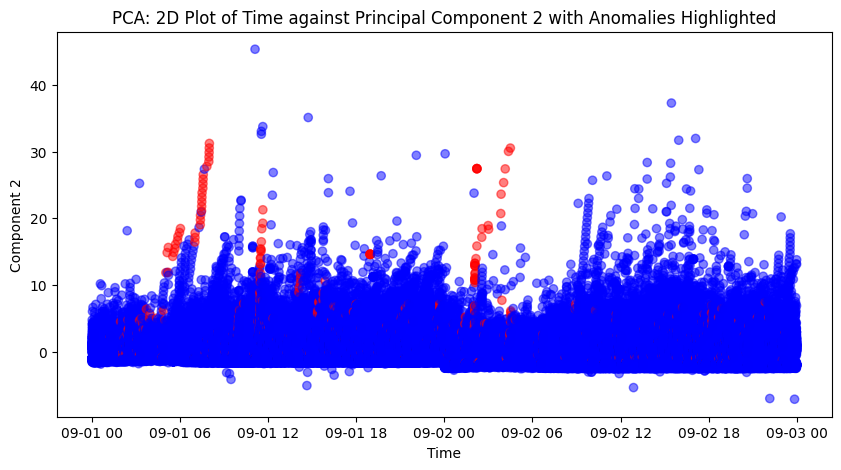

Normalizing using MinMaxScaler


In [9]:
X_train_scaled, X_test_scaled, x_anomalies_scaled, input_shape = data_preparation(sequence_length= 12, normalization=2)  

In [32]:
# average parameter can be macro, weighted, samples, micro
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions, average='micro')))
  print("Recall = {}".format(recall_score(labels, predictions, average='micro')))
    

In [14]:
start_time = pd.to_datetime('2013-09-01 00:00:01')
end_time = pd.to_datetime('2013-09-01 00:51:19')

interval_data , interval_labels_data = extract_time_interval_df( start_time, end_time, sequence_length =input_shape[0], normalisation = 1)


Normalisation 1


In [15]:
interval_data.shape


(3588, 12, 30)

In [16]:
interval_labels_data.shape

(3588, 12)

### Sparse convolutional Autoencoder

In [17]:
sparsity_factor = 1e-7
filters = 32
kernel_size = 3

In [18]:
class SparseConvAutoencoder(tf.keras.Model):
    def __init__(self, filters, kernel_size, input_shape, sparsity_factor):
        super(SparseConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1D(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(input_shape[1], kernel_size=kernel_size, padding="same"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [19]:
sparse_conv_autoencoder = SparseConvAutoencoder(filters=filters, kernel_size=kernel_size,
                                                input_shape=input_shape, sparsity_factor=sparsity_factor)
sparse_conv_autoencoder.build((None,) + input_shape)

sparse_conv_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
sparse_conv_autoencoder.summary()



Model: "sparse_conv_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3, 16)             4464      
                                                                 
 sequential_1 (Sequential)   (None, 12, 30)            5262      
                                                                 
Total params: 9726 (37.99 KB)
Trainable params: 9726 (37.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history_sparse_convolutional = train_model(sparse_conv_autoencoder,X_train_scaled,X_test_scaled)

Epoch 1/20

223/223 [==============================] - 8s 27ms/step - loss: 0.1671 - val_loss: 0.0356
Epoch 2/20
223/223 [==============================] - 5s 23ms/step - loss: 0.0182 - val_loss: 0.0098
Epoch 3/20
223/223 [==============================] - 5s 24ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 4/20
223/223 [==============================] - 5s 23ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 5/20
223/223 [==============================] - 5s 24ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/20
223/223 [==============================] - 5s 24ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/20
223/223 [==============================] - 5s 24ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 8/20
223/223 [==============================] - 5s 23ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/20
223/223 [==============================] - 5s 24ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/20
223/223 [==============================] - 5s 23ms/step - loss: 0.0022 - val_l

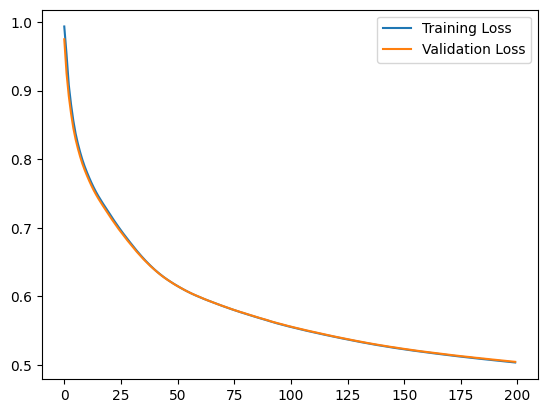

In [59]:
plot_training_curve(history_sparse_convolutional)

7108/7108 [==============================] - 22s 3ms/step


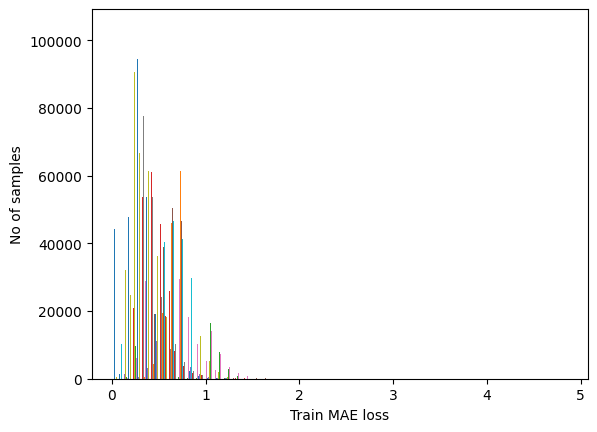

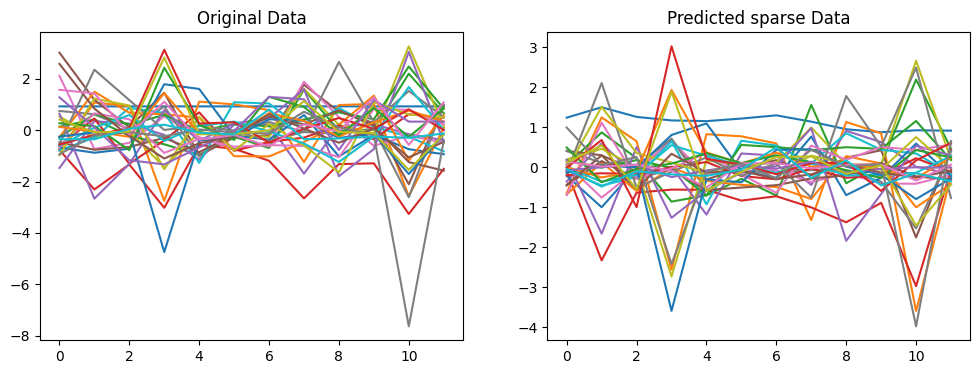

16/16 [==============================] - 0s 5ms/step


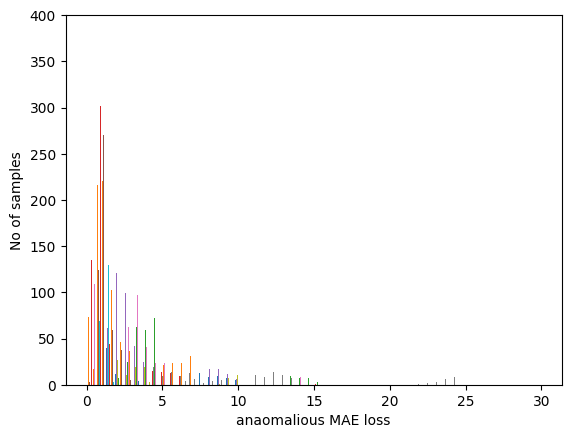

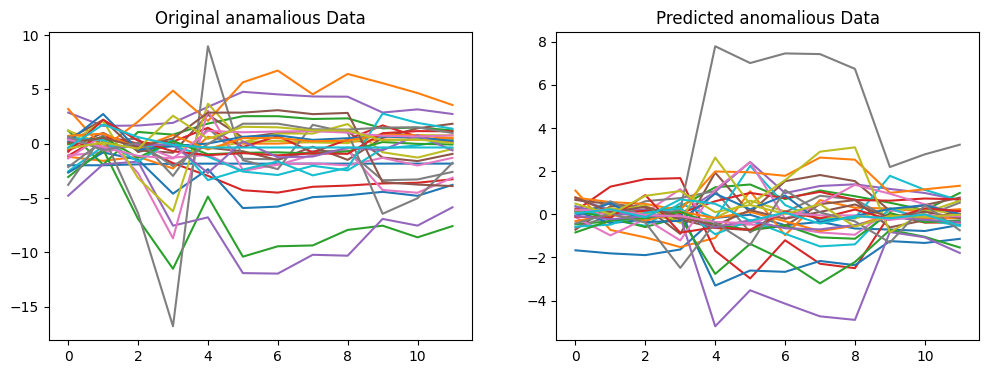

Reconstruction error threshold:  4.845277197959694


In [60]:
reconstruction_data(sparse_conv_autoencoder, X_train_scaled,x_anomalies_scaled)

### contractive convolutional Autoencoder

In [26]:
class ContractiveConvAnomalyDetector(tf.keras.Model):
    def __init__(self, lam):
        super(ContractiveConvAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization()
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=30, kernel_size=3, activation="sigmoid", padding="same"), 
        ])
        self.lam = lam  # Regularization strength of autoencoder

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        total_loss = mse_loss + self.lam * frobenius_norm
        return total_loss   

In [27]:
 def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            x_hat = self(x)
            jacobian = self.compute_jacobian(x)
            loss = self.contractive_loss(x, x_hat, jacobian)
            
        gradients = tape.gradient(loss, self.trainable_variables)
       
        clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
        self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

        return {"loss": loss}

In [28]:
contractive_convolutional_autoencoder = ContractiveConvAnomalyDetector(lam=1e-8)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_convolutional_autoencoder.compile(optimizer=optimizer, loss='mse')


In [29]:
contractive_convolutional_autoencoder.build((None,) + input_shape)
contractive_convolutional_autoencoder.summary()

Model: "contractive_conv_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 12, 8)             17848     
                                                                 
 sequential_3 (Sequential)   (None, 12, 30)            14646     
                                                                 
Total params: 32494 (126.93 KB)
Trainable params: 31950 (124.80 KB)
Non-trainable params: 544 (2.12 KB)
_________________________________________________________________


In [30]:
history_convolutional_contractive = train_model(contractive_convolutional_autoencoder, X_train_scaled, X_test_scaled)

Epoch 1/20
223/223 [==============================] - 32s 116ms/step - loss: 0.0575 - val_loss: 0.0247
Epoch 2/20
223/223 [==============================] - 24s 107ms/step - loss: 0.0179 - val_loss: 0.0075
Epoch 3/20
223/223 [==============================] - 23s 103ms/step - loss: 0.0062 - val_loss: 0.0040
Epoch 4/20
223/223 [==============================] - 22s 97ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 5/20
223/223 [==============================] - 20s 90ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/20
223/223 [==============================] - 21s 94ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/20
223/223 [==============================] - 24s 107ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/20
223/223 [==============================] - 23s 104ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 9/20
223/223 [==============================] - 23s 101ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/20
223/223 [==============================] - 24s 108ms/step - loss

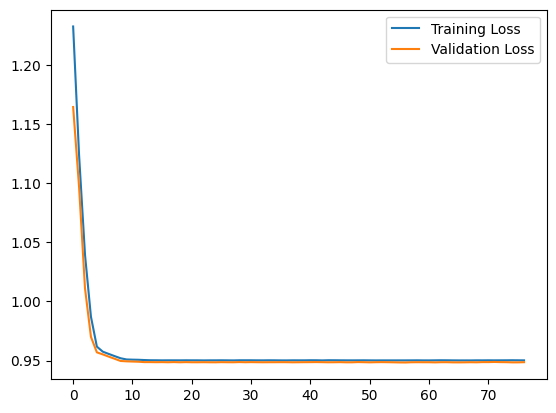

In [66]:
plot_training_curve(history_convolutional_contractive)

7108/7108 [==============================] - 22s 3ms/step


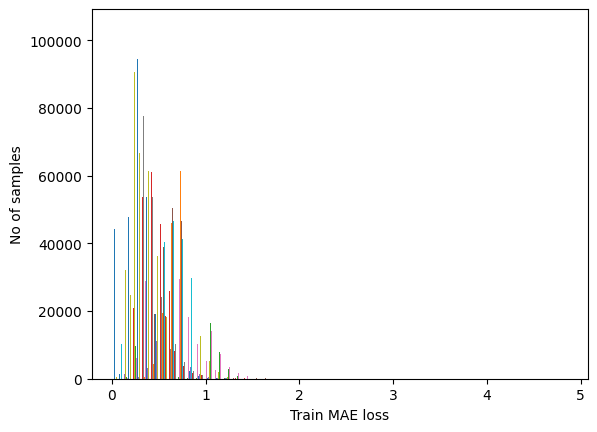

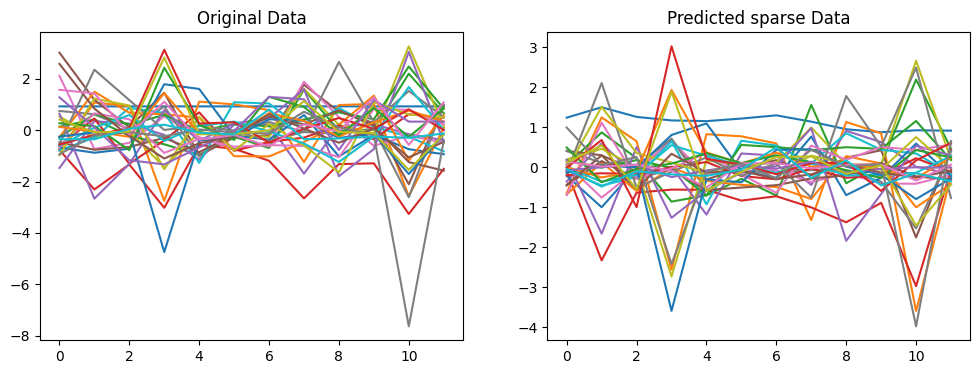

16/16 [==============================] - 0s 3ms/step


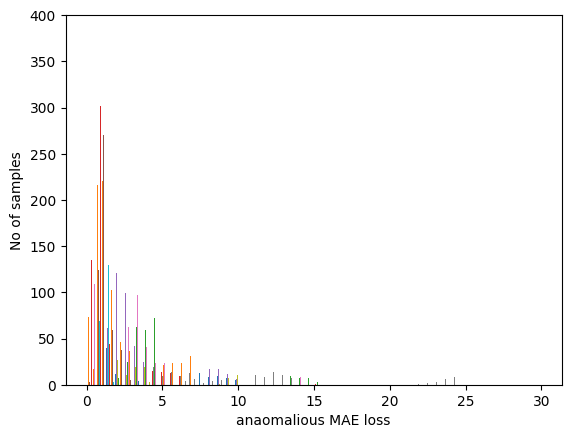

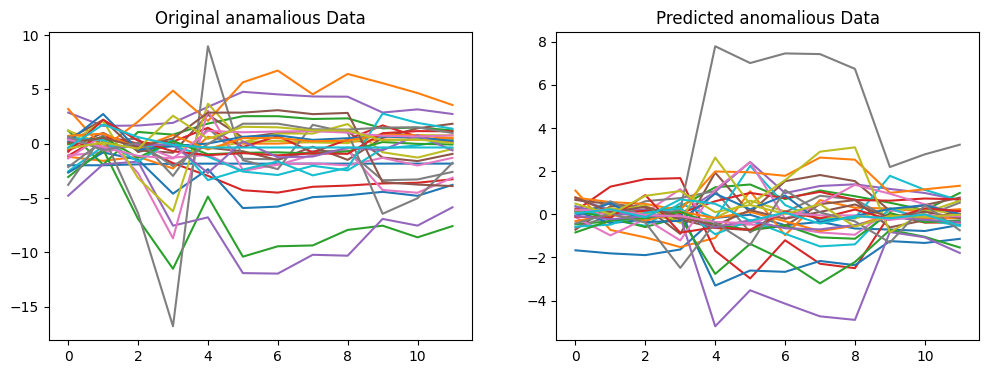

Reconstruction error threshold:  4.845277197959694


In [67]:
reconstruction_data(contractive_convolutional_autoencoder, X_train_scaled, x_anomalies_scaled)

113/113 [==============================] - 1s 6ms/step


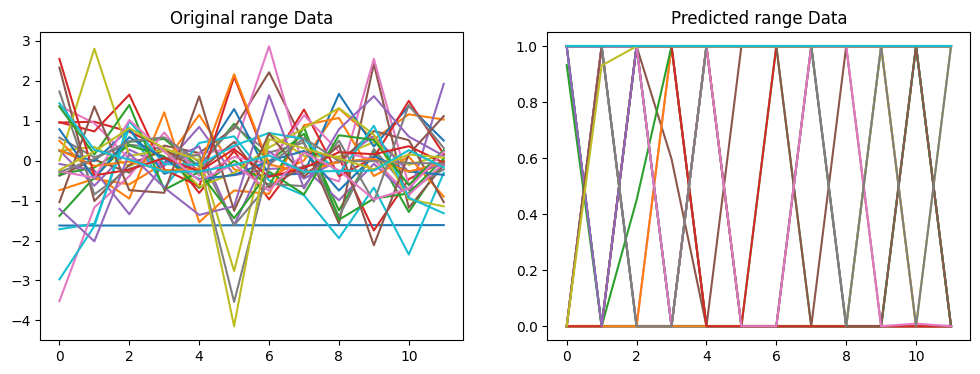

contractive convolutional autoencoder
Accuracy = 0.7533444816053512
Precision = 0.010535557506584723
Recall = 0.5
Threshold:  1.4742303141434445


In [33]:
#subset_predictions = predict_anomalies(contractive_convolutional_autoencoder, threshold_contractive, interval_data)

preds = predict_anomalies(contractive_convolutional_autoencoder, interval_data)

print('contractive convolutional autoencoder')
print_stats(preds, interval_labels_data)
print("Threshold: ", global_threshold)

#### für ein sparse contractive autoencoder 

113/113 [==============================] - 1s 4ms/step


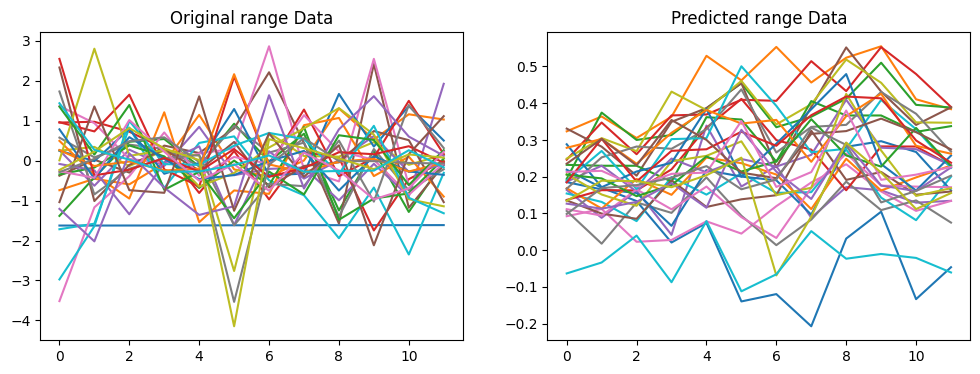

In [23]:
preds = predict_anomalies(sparse_conv_autoencoder, interval_data)

In [34]:
print('sparse convolutional autoencoder')
print_stats(preds, interval_labels_data)
print("Threshold: ", global_threshold)

sparse convolutional autoencoder
Accuracy = 0.7533444816053512
Precision = 0.010535557506584723
Recall = 0.5
Threshold:  1.4742303141434445
